In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.rcParams["font.sans-serif"] = "mingliu"
plt.rcParams["axes.unicode_minus"] = False


<Axes: xlabel='日期'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif'

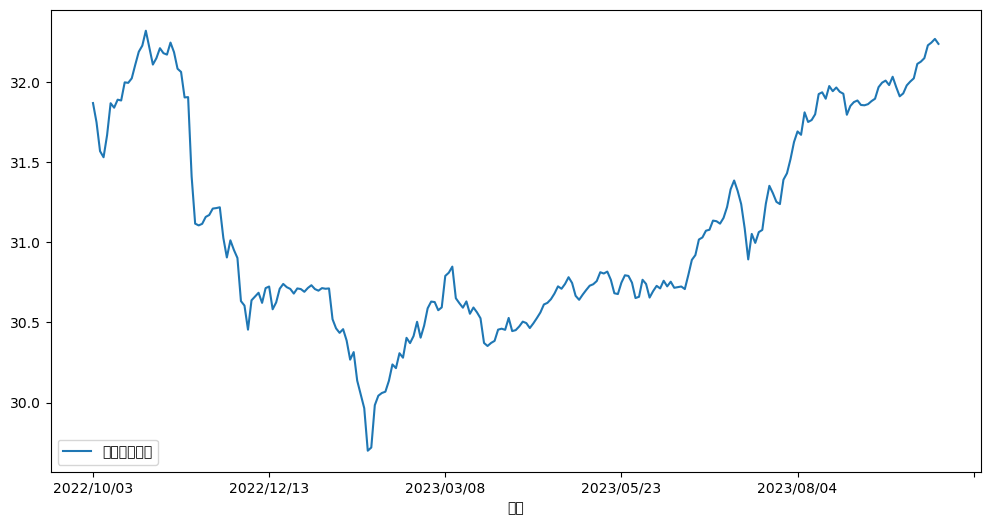

In [7]:
filename = "9925A635-1A26-4D40-BA6B-03DFA7910EF3.csv"
df = pd.read_csv(filename,encoding='big5')
df.plot(kind='line',figsize=(12,6),x='日期',y=['美元／新台幣'])

In [6]:
df

,日期,美元／新台幣,人民幣／新台幣,歐元／美元,美元／日幣,英鎊／美元,澳幣／美元,美元／港幣,美元／人民幣,美元／南非幣,紐幣／美元
0,2022/10/03,31.868,4.458747,0.98080,145.015,1.12020,0.64420,7.84995,7.14730,18.06440,0.56510
1,2022/10/04,31.748,4.493358,0.98790,144.645,1.13920,0.65190,7.84995,7.06555,17.73940,0.57470
2,2022/10/05,31.568,4.482877,0.99425,144.405,1.14070,0.64830,7.84975,7.04190,17.70015,0.57290
3,2022/10/06,31.530,4.474454,0.99000,144.615,1.13230,0.64980,7.84985,7.04665,17.81400,0.57540
4,2022/10/07,31.668,4.455814,0.98050,144.840,1.11930,0.64150,7.84995,7.10710,18.00425,0.56540
...,...,...,...,...,...,...,...,...,...,...,...
236,2023/09/25,32.148,4.395982,1.06360,148.460,1.22335,0.64220,7.81430,7.31305,18.84490,0.59535
237,2023/09/26,32.228,4.409886,1.05910,148.845,1.21835,0.64100,7.81895,7.30810,18.87475,0.59585
238,2023/09/27,32.245,4.409310,1.05650,149.030,1.21485,0.63795,7.82055,7.31295,19.05185,0.59345
239,2023/09/28,32.268,4.413488,1.05180,149.345,1.21690,0.63710,7.82555,7.31125,19.18515,0.59395


In [9]:
USD = pd.DataFrame(df['美元／新台幣'])

import numpy as np

data_all = np.array(USD).astype('floa')

In [13]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
data_all = scalar.fit_transform(data_all)

In [27]:
TIME_STEPS = 14

data = []

for i in range (len(data_all)- TIME_STEPS):
    data.append(data_all[i:i+TIME_STEPS+1])
    

In [28]:
reshape_data= np.array(data).astype('float64')

x = reshape_data[:,:-1]
y = reshape_data[:,-1]

In [29]:
split = 0.8
split_boundary = int(reshape_data.shape[0] * split)

train_x = x[: split_boundary]
test_x = x[split_boundary:]
train_y = y[: split_boundary]
test_y = y[split_boundary :]


In [18]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dropout,Dense

In [30]:
model = Sequential()

In [31]:
INPUT_SIZE=1
model.add(SimpleRNN(input_shape=(TIME_STEPS,INPUT_SIZE),units=256,unroll=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [32]:
model.compile(loss='mse',optimizer="adam",metrics=['accuracy'])

In [33]:
model.fit(train_x,train_y,batch_size=200,epochs=100,validation_split=0.1,verbose=2)

Epoch 1/100
1/1 - 3s - loss: 0.0200 - accuracy: 0.0123 - val_loss: 0.1161 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.1072 - accuracy: 0.0123 - val_loss: 0.6064 - val_accuracy: 0.0000e+00 - 127ms/epoch - 127ms/step
Epoch 3/100
1/1 - 0s - loss: 0.4658 - accuracy: 0.0062 - val_loss: 0.1590 - val_accuracy: 0.0000e+00 - 96ms/epoch - 96ms/step
Epoch 4/100
1/1 - 0s - loss: 0.1117 - accuracy: 0.0062 - val_loss: 0.0121 - val_accuracy: 0.0000e+00 - 97ms/epoch - 97ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0129 - accuracy: 0.0123 - val_loss: 0.0157 - val_accuracy: 0.0000e+00 - 84ms/epoch - 84ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0313 - accuracy: 0.0123 - val_loss: 0.0239 - val_accuracy: 0.0000e+00 - 86ms/epoch - 86ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0504 - accuracy: 0.0123 - val_loss: 0.0086 - val_accuracy: 0.0000e+00 - 81ms/epoch - 81ms/step
Epoch 8/100
1/1 - 0s - loss: 0.0269 - accuracy: 0.0123 - val_loss: 0.0108 - val_accuracy: 0.0000e+00 - 236ms/epoch - 236

In [34]:
predict = model.predict(test_x)

2/2 [==============================] - 0s 8ms/step


In [35]:
print (predict[0:10])

[[0.59721804]
 [0.58488333]
 [0.58733976]
 [0.609475  ]
 [0.6384021 ]
 [0.6643158 ]
 [0.70812744]
 [0.73117256]
 [0.7300273 ]
 [0.7427695 ]]


In [36]:
predict = np.reshape(predict, (predict.size,))
predict_y  = scalar.inverse_transform([[i] for i in predict])
test_y = scalar.inverse_transform(test_y)

print (predict_y[0:10])
print (test_y[0:10])

[[31.26411404]
 [31.23180945]
 [31.23824283]
 [31.29621507]
 [31.37197511]
 [31.43984313]
 [31.55458576]
 [31.61494094]
 [31.61194155]
 [31.64531327]]
[[31.238]
 [31.39 ]
 [31.43 ]
 [31.518]
 [31.625]
 [31.691]
 [31.67 ]
 [31.81 ]
 [31.75 ]
 [31.762]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu


findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif' not found because none of the following families were found: mingliu
findfont: Generic family 'sans-serif'

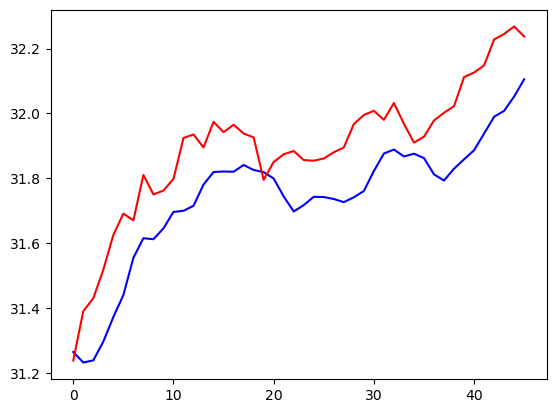

In [37]:
plt.plot(predict_y,'b')
plt.plot(test_y,'r')
plt.show()